**This is the code for our Final model**

1. The train data set is very large so our model wouldn't run in the colab. We trained using a 100GB ram and 16CPU's 

2. You can directly load our model and can test with images in Test folder.

3. Please run the LoadImages() function again if you get any error while loading the images from Test data.

In [ ]:
import numpy as np 
from google.colab import drive
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import add, Conv2D,MaxPool2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape,Conv2DTranspose
from keras.models import Model
from keras import models
from glob import glob
np.random.seed(1)

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**This funtion Loads all the files in high and low folder with same image names, where high contains bright images and low contains low light images.** 

In [ ]:
def LoadImages(path):
  X=[]
  Y=[]
  for i in glob(path+'/high/'+'*.png'):
    img=Image.open(i)
    img=img.resize((500,500))
    img=np.array(img)
    img = img[:, :,::-1]
    Y.append(img)
    j=path+"/low/"+i[len(path+'/high/'):]
    img=Image.open(j)
    img=img.resize((500,500))
    img=np.array(img)
    img = img[:, :,::-1]
    X.append(img)
  X=np.array(X)/255
  Y=np.array(Y)/255
  return X,Y

**Load all the low and high images from Train Folder**

In [ ]:
Trainpath='/content/drive/MyDrive/ML Final Model/Train'
X_Train,Y_Train=LoadImages(Trainpath) 

**This is our model**

In [ ]:
K.clear_session()
def model_1(input):
  model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(input)
  model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
  model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)
    
  model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(input)
  model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

  #Here we encode and decode to extract features from low resolution image
  x=Conv2D(64,(3,3),activation='relu',padding='same')(model_2)
  x=MaxPool2D(padding='same')(x)
  x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
  x=MaxPool2D(padding='same')(x)
  x=Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
  x=Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
  
  model_2_0=Conv2D(64,(3,3),activation='relu',padding='same')(x)
    
  model_add = add([model_1,model_2,model_2_0])
    
  model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
  model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
  model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)
    
  model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
  model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

  model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_2)
    
  model_add_2 = add([model_3_1,model_3_2,model_3])
    
  model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
  model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
  model_add_3 = add([model_4_1,model_add_2,model_4])
    
  model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
  model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)
    
  model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)
    
  return model_5

**Here we create a CNN model with layers as specified above**

In [ ]:
inp_x=Input(shape=(500,500,3))
Output=LowModel(inp_x)
model=Model(inputs=inp_x,outputs=Output)
model.compile(optimizer="adam", loss='mean_squared_error')

**This is used to Plot our model**

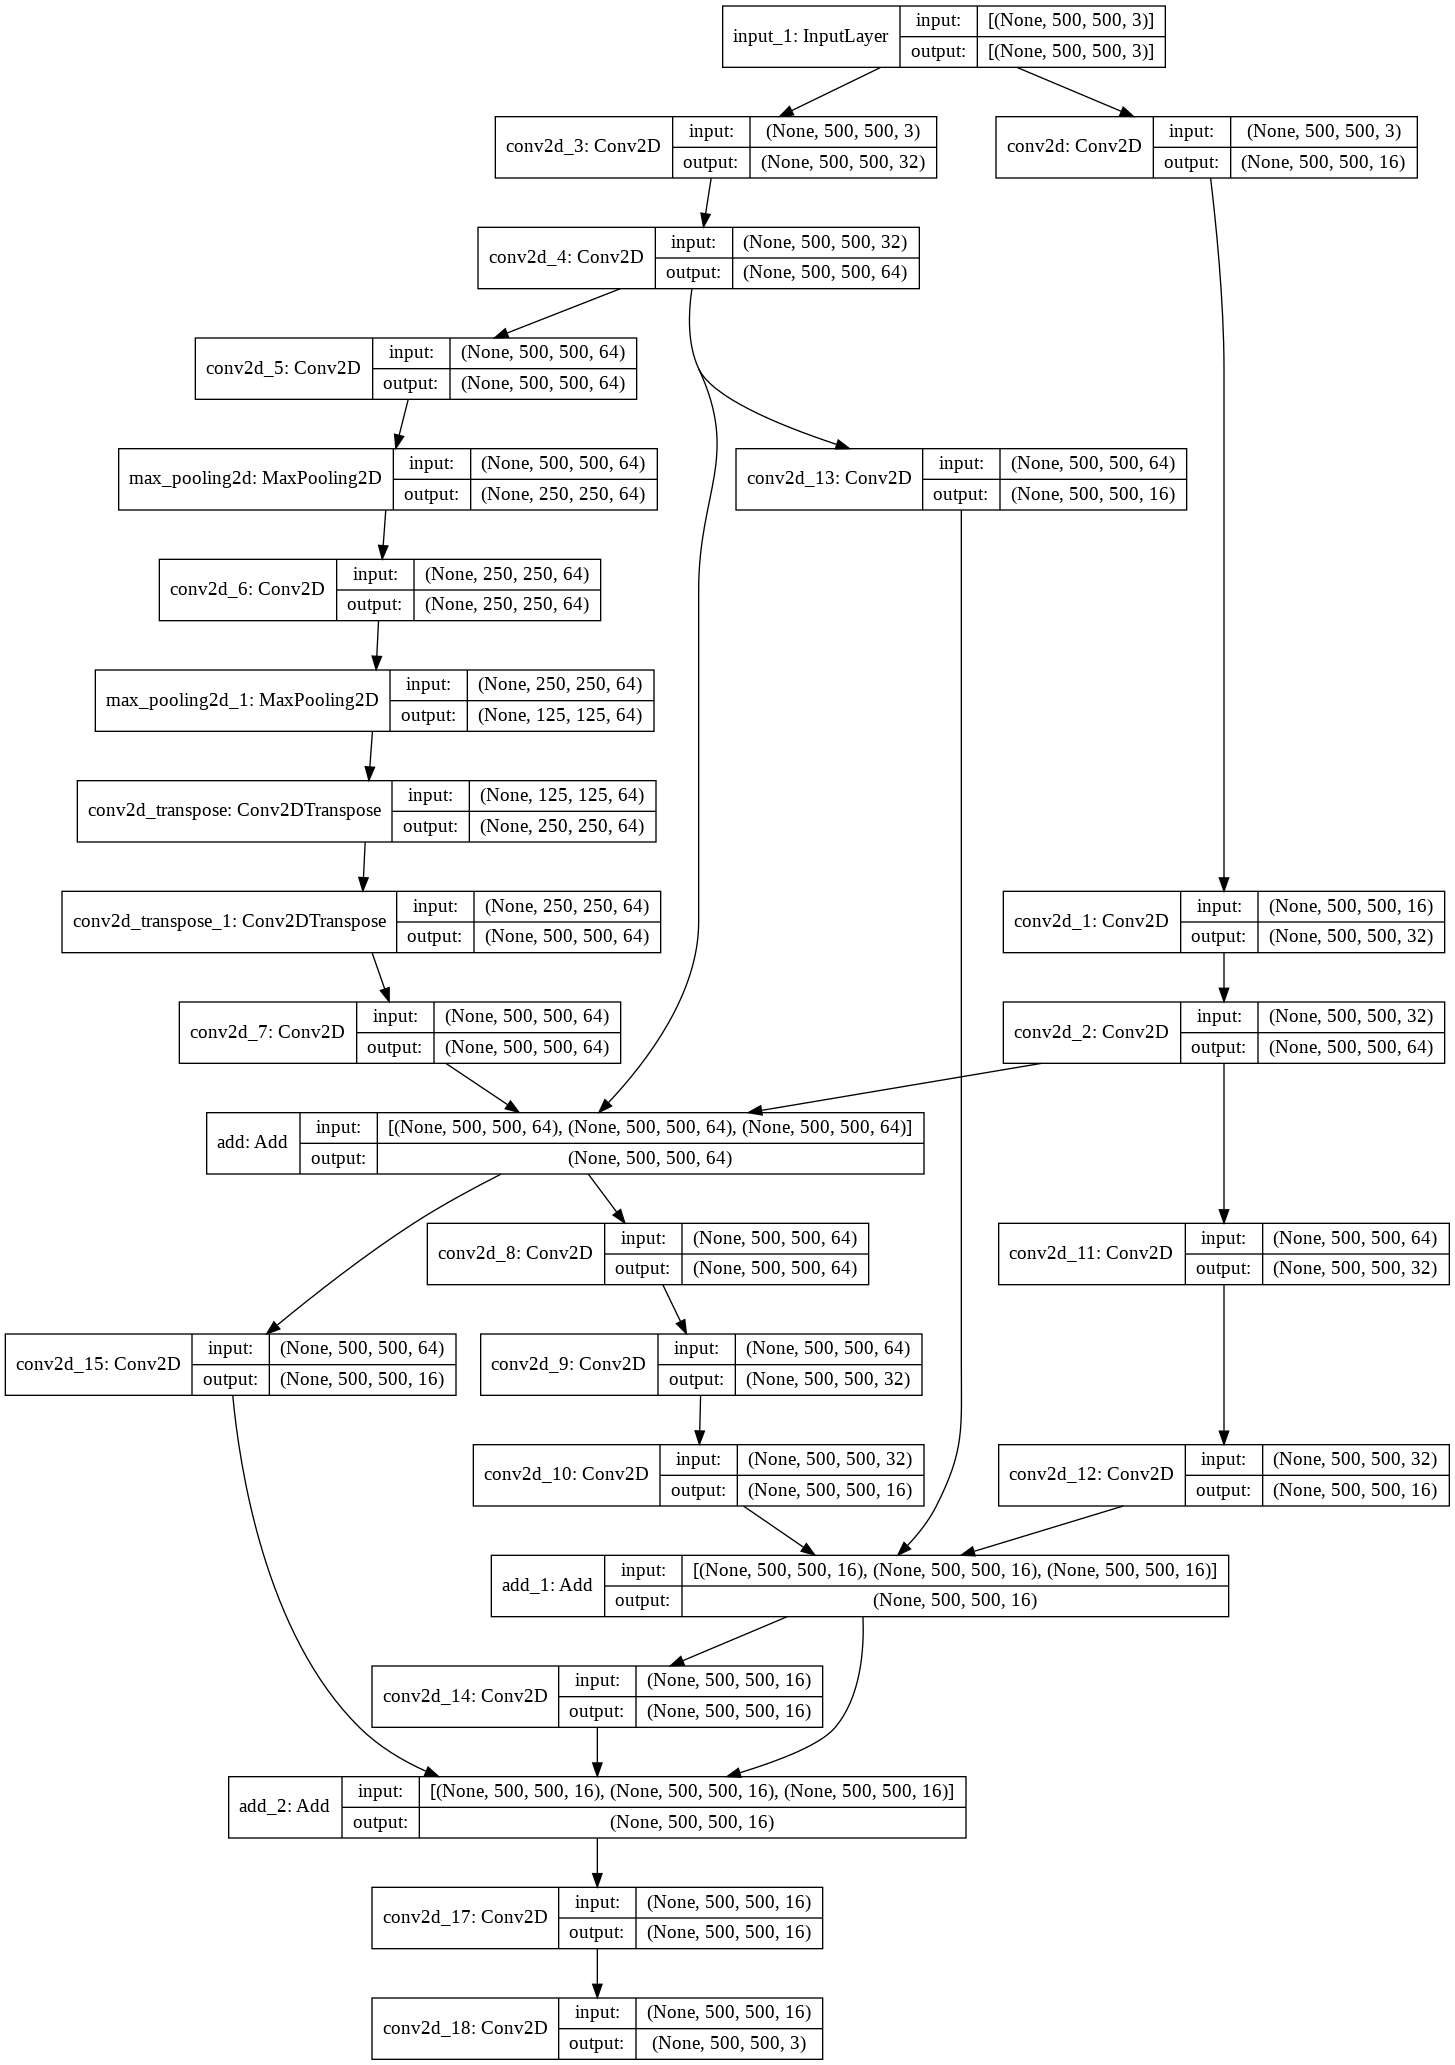

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='modelsa1.png',show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='modelsa1.png')

In [ ]:
Y_Train.shape

(485, 500, 500, 3)

**This would take 4.5 hours in 16 cpu and 100 gb ram architecture**

In [ ]:
model.fit(x=X_Train,y=Y_Train,epochs=40,batch_size=50,shuffle=True)

**This is to save our model**

In [ ]:
model.save('/content/drive/MyDrive/ML Final Model/FinalModel')

**This is to load our model**

In [ ]:
SavedModel=models.load_model('/content/drive/MyDrive/ML Final Model/FinalModel')

**This is to load our Test data**

In [ ]:
TestPath='/content/drive/MyDrive/ML Final Model/Test'
X_Test,Y_Test=LoadImages(TestPath)
X_Test.shape

(15, 500, 500, 3)

**This would predict for Trained data**

In [ ]:
Out_images=SavedModel.predict(X_Test)

**This is used to display the results**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Ground Truth')

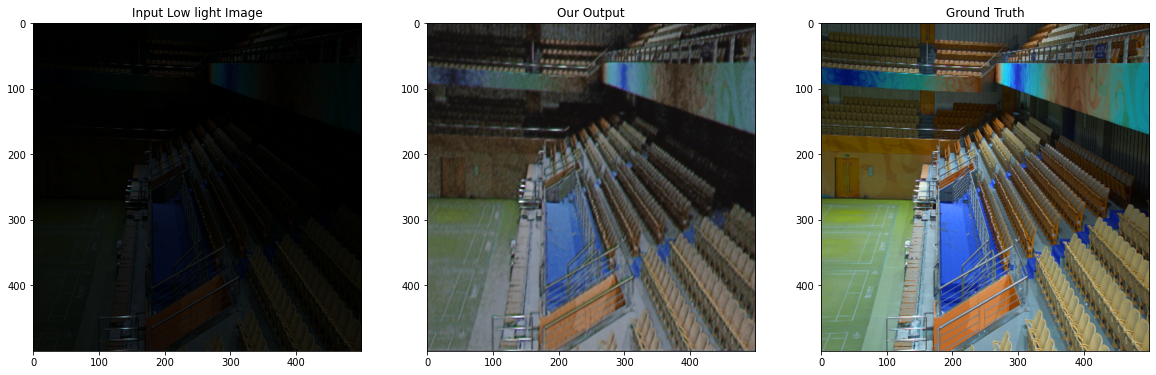

In [ ]:
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20, 10

#There are 15 images in the Train folder.
#You can give 0-14 in parm to view different images
parm=10

fig,(ax1,ax2,ax3)=plt.subplots(1,3)
ax1.imshow(X_Test[parm])
ax1.set_title('Input Low light Image')
ax2.imshow(Out_images[parm])
ax2.set_title('Our Output')
ax3.imshow(Y_Test[parm])
ax3.set_title('Ground Truth')

**To view model summary**

In [ ]:
SavedModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 500, 500, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 500, 500, 64) 8256        conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 500, 500, 64) 36928       conv2d_4[0][0]                   
______________________________________________________________________________________________